# 결측치 판단 및 처리  
### 1. 결측치의 유무와 비율을 살펴보고 적절한 방법으로 처리합니다.
이상치 판단 및 처리  

### 2. 숫자형 변수 각각에 대해, 데이터의 index와 변수 값 사이의 scatter plot을 그려보고 이상치가 관찰될 경우 제거합니다.

### 3. 택시 탑승 및 하차 시간을 활용할 수 있을지 고민해보세요.  
( 택시의 주행 시간과 주행 거리, 요금 등의 상관 관계도 살펴볼 수 있겠죠? )

### 4. Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보세요.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv("~/data/trip.csv")

## * Check the data

In [3]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


## 1. 결측치 처리 (Check Missing values and Drop)

In [6]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [7]:
data[data['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [8]:
data = data.dropna()
data  

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


3 rows are dropped (22701 -> 22698)

## * Check Duplicated Data

In [9]:
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [10]:
data[data['passenger_name']=='Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [11]:
data[data['passenger_name']=='Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [12]:
data.drop_duplicates()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


2 rows are dropped (22698 -> 22696)

## * Add Total cost Column

In [13]:
data['total_fare'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']

In [14]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_fare
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0,15.76
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0,20.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0,7.95
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,26.89
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0,16.50


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22698 non-null  object 
 1   tpep_pickup_datetime   22698 non-null  object 
 2   tpep_dropoff_datetime  22698 non-null  object 
 3   payment_method         22698 non-null  object 
 4   passenger_count        22698 non-null  int64  
 5   trip_distance          22698 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22698 non-null  float64
 8   tolls_amount           22698 non-null  float64
 9   total_fare             22698 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.9+ MB


## * Change datatype of time

In [16]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [17]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22698 non-null  object        
 1   tpep_pickup_datetime   22698 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22698 non-null  datetime64[ns]
 3   payment_method         22698 non-null  object        
 4   passenger_count        22698 non-null  int64         
 5   trip_distance          22698 non-null  float64       
 6   fare_amount            22698 non-null  float64       
 7   tip_amount             22698 non-null  float64       
 8   tolls_amount           22698 non-null  float64       
 9   total_fare             22698 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 1.9+ MB


In [19]:
data['total_duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime'] 

## 2. 이상치 처리 (Check Outliers)

### 1) Total Fare

<AxesSubplot:ylabel='total_fare'>

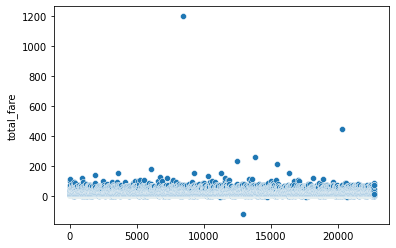

In [20]:
sns.scatterplot(x= data.index, y= data['total_fare'])

In [21]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_fare,total_duration
count,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698
mean,1.643581,2.912318,13.024009,1.835327,0.312302,15.171638,0 days 00:17:00.707154815
std,1.304983,3.651335,13.240074,2.800093,1.398775,16.054741,0 days 01:01:59.832077059
min,0.000000,0.000000,-120.000000,0.000000,0.000000,-120.000000,-1 days +23:43:01
25%,1.000000,0.990000,6.500000,0.000000,0.000000,7.500000,0 days 00:06:39
50%,1.000000,1.610000,9.500000,1.350000,0.000000,10.950000,0 days 00:11:10.500000
75%,2.000000,3.060000,14.500000,2.450000,0.000000,16.560000,0 days 00:18:23
max,36.000000,33.960000,999.990000,200.000000,19.100000,1199.990000,0 days 23:59:33


In [22]:
data[data['total_fare']==1199]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_fare,total_duration


In [23]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_fare,total_duration
count,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698
mean,1.643581,2.912318,13.024009,1.835327,0.312302,15.171638,0 days 00:17:00.707154815
std,1.304983,3.651335,13.240074,2.800093,1.398775,16.054741,0 days 01:01:59.832077059
min,0.000000,0.000000,-120.000000,0.000000,0.000000,-120.000000,-1 days +23:43:01
25%,1.000000,0.990000,6.500000,0.000000,0.000000,7.500000,0 days 00:06:39
50%,1.000000,1.610000,9.500000,1.350000,0.000000,10.950000,0 days 00:11:10.500000
75%,2.000000,3.060000,14.500000,2.450000,0.000000,16.560000,0 days 00:18:23
max,36.000000,33.960000,999.990000,200.000000,19.100000,1199.990000,0 days 23:59:33


total fare가 혼자서 1,199로 엄청 튀는 애가 하나 있다. 거리를 확인해보니 이상하다. 없애주기로 한다.

In [24]:
data = data[data['total_fare'] < 1190]

In [25]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_fare,total_duration
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,15.76,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,20.00,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,7.95,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,26.89,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,16.50,0 days 00:16:43
...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,4.00,0 days 00:03:16
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,72.40,0 days 00:40:48
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,4.50,0 days 00:04:08
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,12.20,0 days 00:11:56


<AxesSubplot:ylabel='total_fare'>

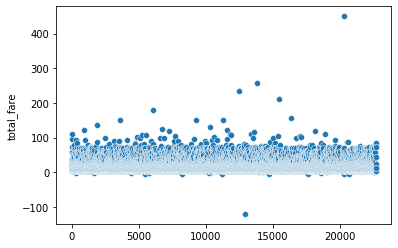

In [26]:
sns.scatterplot(x=data.index, y=data['total_fare'])

<AxesSubplot:ylabel='fare_amount'>

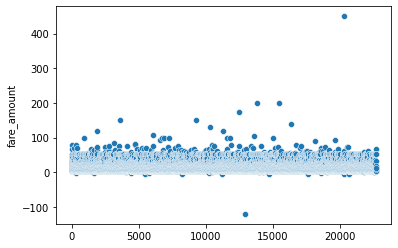

In [27]:
sns.scatterplot(x=data.index, y=data['fare_amount'])

In [28]:
data['payment_method'].value_counts()

Cash           11194
Debit Card      5782
Credit Card     5721
Name: payment_method, dtype: int64

## 2) Fare amount

<AxesSubplot:ylabel='fare_amount'>

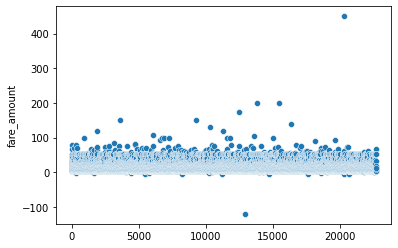

In [29]:
sns.scatterplot(x=data.index, y=data['fare_amount'])

distance = 0 인데 fare amount가 450 인게 이상하다  
반대로 min 값은 음수가 나와서 역시 이상하다

In [30]:
data = data[~((data['fare_amount'] > 400) | (data['fare_amount'] < 0))]

In [31]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_fare,total_duration
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,15.76,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,20.00,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,7.95,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,26.89,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,16.50,0 days 00:16:43
...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,4.00,0 days 00:03:16
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,72.40,0 days 00:40:48
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,4.50,0 days 00:04:08
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,12.20,0 days 00:11:56


<AxesSubplot:ylabel='fare_amount'>

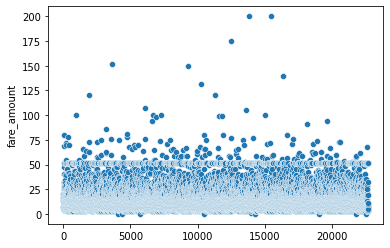

In [32]:
sns.scatterplot(x=data.index, y=data['fare_amount'])

## 3) Passenger Count

In [33]:
data['passenger_count'].value_counts().sort_values()

36        1
0        33
4       455
6       691
3       952
5      1142
2      3302
1     16106
Name: passenger_count, dtype: int64

이게 뭐야. 36명은 너무 튄다. 제거한다.

In [34]:
data = data[~(data['passenger_count'] == 36)]

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22681 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22681 non-null  object         
 1   tpep_pickup_datetime   22681 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22681 non-null  datetime64[ns] 
 3   payment_method         22681 non-null  object         
 4   passenger_count        22681 non-null  int64          
 5   trip_distance          22681 non-null  float64        
 6   fare_amount            22681 non-null  float64        
 7   tip_amount             22681 non-null  float64        
 8   tolls_amount           22681 non-null  float64        
 9   total_fare             22681 non-null  float64        
 10  total_duration         22681 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(5), int64(1), object(2), timedelta64[ns](1)
memory usage: 2.1+ MB


## 4) Trip Distance

In [36]:
data['total_duration'] = pd.to_numeric(data['total_duration'])

/tmp/ipykernel_156/3706592093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_duration'] = pd.to_numeric(data['total_duration'])


<AxesSubplot:ylabel='trip_distance'>

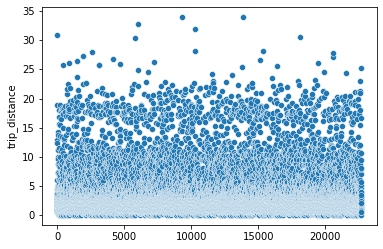

In [37]:
sns.scatterplot(x=data.index, y=data['trip_distance'])

이상해보이는 건 없다. 넘어간다.

## 3. 주행요금과 주행거리, 시간과의 관계

relevant features : fare_amount , total_duration , trip_distance

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

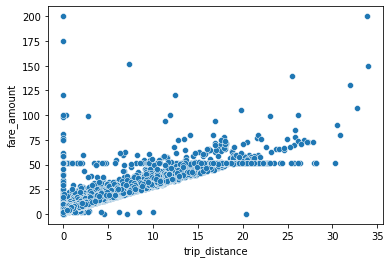

In [38]:
sns.scatterplot(x=data['trip_distance'], y=data['fare_amount'])

distance가 0인데 fare를 받은 경우들이 많이 보인다. 확인한다.

In [39]:
data[data['trip_distance'] ==0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_fare,total_duration
129,Linda Kaufman,2017-06-22 08:05:33,2017-06-22 08:05:40,Debit Card,1,0.0,20.0,0.00,0.0,20.00,7000000000
248,Erik Perez,2017-09-18 20:50:53,2017-09-18 20:51:03,Cash,1,0.0,2.5,0.00,0.0,2.50,10000000000
293,Deborah Sanford,2017-10-04 19:46:24,2017-10-04 19:46:50,Cash,1,0.0,2.5,0.00,0.0,2.50,26000000000
321,Ryan Hughes,2017-02-22 04:01:44,2017-02-22 04:01:53,Cash,1,0.0,2.5,0.00,0.0,2.50,9000000000
426,David Parker,2017-01-14 07:00:26,2017-01-14 07:00:53,Cash,1,0.0,2.5,6.70,0.0,9.20,27000000000
...,...,...,...,...,...,...,...,...,...,...,...
22192,Angela French,2017-10-16 08:34:07,2017-10-16 08:34:10,Credit Card,1,0.0,2.5,0.00,0.0,2.50,3000000000
22327,Kelsey Rogers,2017-07-21 23:30:29,2017-07-21 23:31:12,Debit Card,1,0.0,16.8,3.42,0.0,20.22,43000000000
22385,Joseph Castillo,2017-01-07 04:48:42,2017-01-07 04:51:03,Cash,1,0.0,10.0,0.00,0.0,10.00,141000000000
22568,Christine Edwards,2017-03-07 02:24:47,2017-03-07 02:24:50,Credit Card,1,0.0,0.0,0.00,0.0,0.00,3000000000


시간을 확인해보니 잠깐씩이라도 탑승을 했다. 아마 탔다가 뭔 일 있어서 다시 내린 사람들인가보다.

<AxesSubplot:xlabel='trip_distance', ylabel='total_duration'>

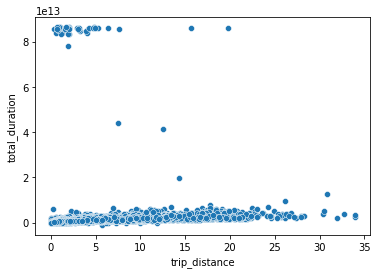

In [40]:
sns.scatterplot(x=data['trip_distance'], y=data['total_duration'])

## 4. Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 바꾸기

In [41]:
data['payment_method']

0        Debit Card
1        Debit Card
2        Debit Card
3              Cash
4        Debit Card
            ...    
22696          Cash
22697          Cash
22698    Debit Card
22699    Debit Card
22700          Cash
Name: payment_method, Length: 22681, dtype: object

In [42]:
data['payment_method'].value_counts()

Cash           11187
Debit Card      5776
Credit Card     5718
Name: payment_method, dtype: int64

In [46]:
data['payment_method'].replace({'Debit Card': 'Card', 'Credit Card': 'Card'}, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [47]:
data['payment_method'].value_counts()

Card    11494
Cash    11187
Name: payment_method, dtype: int64

In [48]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_fare,total_duration
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,15.76,844000000000
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,20.00,1590000000000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,7.95,432000000000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,26.89,1815000000000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,16.50,1003000000000
...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,4.00,196000000000
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,72.40,2448000000000
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,4.50,248000000000
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,12.20,716000000000


## 회고 

* Keep : missing value, duplicate, outlier 확인 및 drop 하는 방법을 확실히 숙지했다. 재밌다. 상관관계 확인도 해보고, 이리저리 데이터를 만져본 건 참 잘한 것 같다. 
* Prob : 날짜형, 문자형 데이터를 뽑아낼 때 dt, str등 추가적인 명령어를 써줘야하는 걸 주의해야겠다.
* Try : DataFrame, Series 형식에 따라 문법이 적용 안되는 부분이 헷갈린다. 추가적으로 보완해야겠다.